In [2]:
__author__ = "Tlacaelel iCPAc" 
__email__ = "tlacaelel.icapc@gmail.com"

In [3]:
import matplotlib.pyplot as plt
from numpy import linalg as LA


In [4]:
"""La clase que crea los fractales"""
class Fractal:
    
    def perpendicular(self, puntos, x0, dirc=1, propr=0, conpropr=True, unit=True):
        """Dados un segmento: puntos, calcula su perpendicular a èl
        y lo desplaza a x0
        Se considera que el plano sòlo tiene dos direcciones para 
        la perpendicualar
        Y le da el tamaño propr"""
        
        #Segmento del punto 0 al punto 1
        seg = [puntos[1][0]-puntos[0][0], puntos[1][1]-puntos[0][1]]
        tam = LA.norm(seg)
        seg[0] = seg[0] / tam
        seg[1] = seg[1] / tam

        #la perpendicular entre el punto 0 y el punto 1
        if dirc > 0:
            perp = [-seg[1], seg[0]]
        else:
            perp = [seg[1], -seg[0]]

        #el perpendicuar con el nuevo tamaño: altura
        if propr == 0:
            if unit:
                tm = 1
            else:
                tm = tam
        else:
            if conpropr:
                tm = tam / propr
            else:
                tm = propr
            
        perp[0] = perp[0] * tm
        perp[1] = perp[1] * tm

        #se desplaza al lugar que le toca
        perp[0] = perp[0] + x0[0]
        perp[1] = perp[1] + x0[1]
        
        return perp

    def NuevaFigura(self, puntos):
        """Dada la figura: puntos
        Calcula la nueva figura"""
        x0 = puntos[0]
        x1 = puntos[2]
        x2 = self.perpendicular([x0, x1], x0, 1, 2)

        return [[x2, x0, x1]]
        
    def Espiral(self, puntos, nivel):
        """Según el nivel crea la nueva figura"""
        for i in range(nivel):
            puntos.extend(self.NuevaFigura(puntos[-1]))
            
        """Dibuja cada triángulo"""
        for tr in puntos:
            x, y = zip(*tr)
            plt.plot(x, y, lw=.51, color='r')
            
        """Para cerrar el último triángulo"""
        finPto = [puntos[-1][0], puntos[0][2]]
        x, y = zip(*finPto)
        plt.plot(x, y, lw=.51, color='r')

        plt.title("Espiral Raiz Cuadrada")


        
    def SiguientePunto(self, x, y, tam, conpropr, unit):
        perp = self.perpendicular([x, y], y, -1, tam, conpropr, unit)
        return [perp]

    def EspiralPoligonal(self, puntos, nivel):
        seg = [puntos[1][0]-puntos[0][0], puntos[1][1]-puntos[0][1]]
        tam = LA.norm(seg)

        unit = False
        conpror = False
        #dame el siguiente punto
        for i in range(nivel):
            puntos.extend(
                self.SiguientePunto(puntos[i], puntos[i+1], tam+(1/(i+1)), \
                                    conpror, unit))
            tam = 1/(i+1)

        x, y = zip(*puntos)
        plt.plot(x, y, lw=1.5)

        return
    
    
    
    def puntoRazon(self, x, y, rzn):
        x1 = (x[0]+ rzn*y[0]) / (rzn+1)
        y1 = (x[1]+ rzn*y[1]) / (rzn+1)
        return [x1, y1]
    
    def Segmento(self, xi, xf, trc):
        m = [(a + b)/2 for a, b in zip(xi, xf)]
        nvalista = [trc, self.puntoRazon(trc, m, 2)]
        x, y = zip(*nvalista)
        plt.plot(x, y, self.color) # ro puntos rojos #ro- linea roja entre puntos
        if self.color == "r-":
            self.color = "b-"
        else:
            self.color =  "r-"

    def Estrella(self, puntos):
        x, y = zip(*puntos)

        #coordenadas
        self.Segmento(puntos[0], puntos[1], puntos[2])
        self.Segmento(puntos[1], puntos[2], puntos[0])
        self.Segmento(puntos[2], puntos[0], puntos[1])

        #Calcula nuevos puntos
        pid = self.puntoRazon(puntos[0], puntos[1], 1)
        pia = self.puntoRazon(puntos[0], puntos[2], 1)
        pi = [puntos[0], pid, pia]
        pd = [self.puntoRazon(puntos[0], puntos[1], 1), puntos[1],
                self.puntoRazon(puntos[1], puntos[2], 1)]
        pa = [self.puntoRazon(puntos[0], puntos[2], 1),
                self.puntoRazon(puntos[1], puntos[2], 1), puntos[2]]

        return [pi, pd, pa]

    def Sierpinski(self, nivel, puntos):
        self.color = "r-"
        for i in range(nivel):
            nvsP = []
            for tr in puntos:
                nvsP.extend(self.Estrella(tr))
            puntos = nvsP

            
            
    def NuevaCarpeta(self, puntos):
        #Primer cuadrado
        cuad1 = []
        cuad1.extend([puntos[0]])
        cuad1.extend([self.puntoRazon(puntos[1], puntos[0], 2)])
        cuad1.extend([self.puntoRazon(puntos[2], puntos[0], 2)])
        cuad1.extend([self.puntoRazon(puntos[3], puntos[0], 2)])
        
        #Segundo cuadrado
        cuad2 = []
        cuad2.extend([cuad1[1]])
        cuad2.extend([self.puntoRazon(puntos[0], puntos[1], 2)])
        cuad2.extend([self.puntoRazon(puntos[3], puntos[1], 2)])
        cuad2.extend([cuad1[2]])

        #Tercer cuadrado
        cuad3 = []
        cuad3.extend([cuad2[1]])
        cuad3.extend([puntos[1]])
        cuad3.extend([self.puntoRazon(puntos[2], puntos[1], 2)])
        cuad3.extend([cuad2[2]])

        #Cuarto cuadrado
        cuad4 = []
        cuad4.extend([cuad3[3]])
        cuad4.extend([cuad3[2]])
        cuad4.extend([self.puntoRazon(cuad3[2], puntos[2], 1)])
        cuad4.extend([self.puntoRazon(puntos[0], puntos[2], 2)])

        #Quinto cuadrado
        cuad5 = []
        cuad5.extend([cuad4[3]])
        cuad5.extend([cuad4[2]])
        cuad5.extend([puntos[2]])
        cuad5.extend([self.puntoRazon(puntos[3], puntos[2], 2)])

        #Sexto cuadrado
        cuad6 = []
        cuad6.extend([self.puntoRazon(puntos[1], puntos[3], 2)])
        cuad6.extend([cuad5[0]])
        cuad6.extend([cuad5[3]])
        cuad6.extend([self.puntoRazon(puntos[2], puntos[3], 2)])

        #Séptimo cuadrado
        cuad7 = []
        cuad7.extend([self.puntoRazon(puntos[0], puntos[3], 2)])
        cuad7.extend([cuad6[0]])
        cuad7.extend([cuad6[3]])
        cuad7.extend([puntos[3]])
        
        #Octavo cuadrado
        cuad8 = []
        cuad8.extend([self.puntoRazon(puntos[3], puntos[0], 2)])
        cuad8.extend([cuad1[2]])
        cuad8.extend([cuad7[1]])
        cuad8.extend([cuad7[0]])

        return  [cuad1, cuad2, cuad3, cuad4, cuad5, cuad6, cuad7, cuad8]

    def Carpeta(self, puntos, fill, nivel):
        for i in range(nivel):
            nvsP = []
            for tr in puntos:
                nvsP.extend(self.NuevaCarpeta(tr))
            puntos = nvsP

        clr = "rd"
        for tr in puntos:
            x, y = zip(*tr)
            if fill == True:
                if clr == "blue":
                    clr = "black"
                else:
                    clr = "navy"
                plt.fill(x, y, color=clr)
            else:
                plt.plot(x, y, 'o', ms="1")
            

        plt.axis('equal')
        plt.show()
            
        

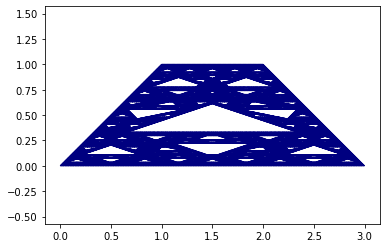

In [5]:
carpeta = Fractal()
puntos = [[[0, 0], [3, 0], [2, 1], [1, 1]]]
carpeta.Carpeta(puntos, True, nivel = 5)


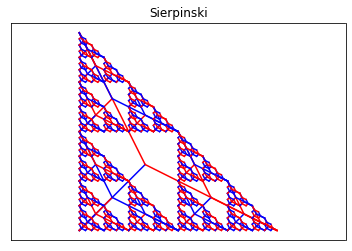

In [6]:
sier = Fractal()

puntos = [[[0, 0], [3, 0], [0, 3]]]
nivel = 6

sier.Sierpinski(nivel, puntos)

plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.title("Sierpinski")

plt.show()


Text(0.5, 1.0, 'Espiral Poligonal')

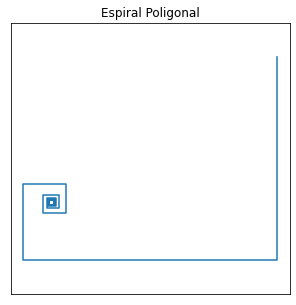

In [7]:
esp = Fractal()

puntos = [[4, 4], [4, 0]]
nivel = 24

plt.figure(figsize=(5, 5))
esp.EspiralPoligonal(puntos, nivel)

plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.title("Espiral Poligonal")


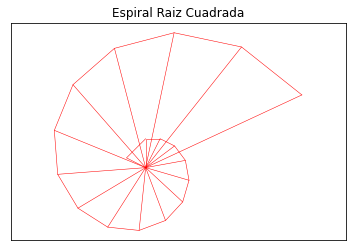

In [8]:
esp = Fractal()

puntos = [[[0, 1], [0, 0], [1, 0]]]
puntos = [[[1, 1], [0, 0], [1, -.51]]]
nivel = 16
esp.Espiral(puntos, nivel)

plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()
